In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather

In [2]:
calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')
reviews = pd.read_csv('./reviews.csv')

# Assess

In [3]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [8]:
listings.shape

(3585, 95)

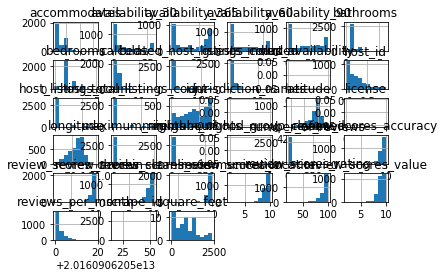

In [9]:
listings.hist();

# Questions:
> 1. What were the most common prices of the AirBNBs?
> 2. Are certain Neighbourhoods associated with higher AirBNB prices?
> 3. If the price is higher, is the rating higher?

# What were the most common prices of the AirBNBs?

### Cleaning

In [10]:
listings.price = listings.price.apply(lambda x: x.replace('$',''))
# https://towardsdatascience.com/5-methods-to-remove-the-from-your-data-in-python-and-the-fastest-one-281489382455
#creating a loop that iterates through all rows in the column 'price' in the listings dataframe, and replaces all
# of the dollar signs ($) with empty strings ('').

In [11]:
listings.price = listings.price.apply(lambda x: x.replace(',',''))
#https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
#creating a loop that iterates through all rows in the column 'price' in the listings dataframe, and replaces all
# of the commas (,) with empty strings ('').

In [12]:
listings['price'] = listings['price'].astype(np.float64)
#https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python/46088485
#converts the price column (which is currently an object) into a float64. This is important so that the values are not
#seen as strings but as numbers as they are. 

### Analyze and Visualize

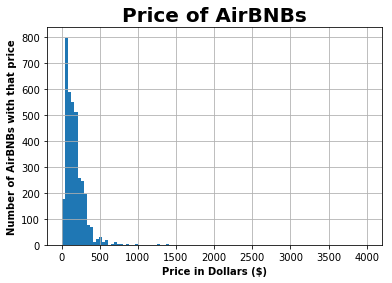

<Figure size 2880x720 with 0 Axes>

In [13]:
listings['price'].hist(bins = 100);
plt.title('Price of AirBNBs', size = 20, weight = 'bold');
plt.ylabel('Number of AirBNBs with that price', weight = 'bold');
plt.xlabel('Price in Dollars ($)', weight = 'bold');
plt.figure(figsize=(40, 10));

> Here I looked at all the prices of the AirBNBs, and at the moment, the range of values is really large, as some prices are 3000, and 4000 dollars, whereas the rest of prices are under 1000 dollars. This makes it harder to see the prices, and where they are in the histogram (the bins are too large). 

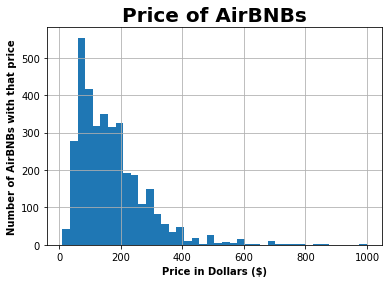

In [14]:
listings[listings['price'] <1000].price.hist(bins=40); # Here I only selected the values that were less than 1000 dollars in price, so that the histogram could be more informative.
plt.title('Price of AirBNBs', size = 20, weight = 'bold');
plt.ylabel('Number of AirBNBs with that price', weight = 'bold');
plt.xlabel('Price in Dollars ($)', weight = 'bold');

> As this histogram is <b>Right Skewed</b>, it shows us, that the prices generally seem to be on the lower end of 1000 dollars, and in the under 200 dollar price range. There are also many AirBNBs that have a price range between 200 and 400 dollars, but these are substantially less than those AirBNBs under 200 dollars. 

# Are certain Neighbourhoods associated with higher AirBNB prices?

### Visualize

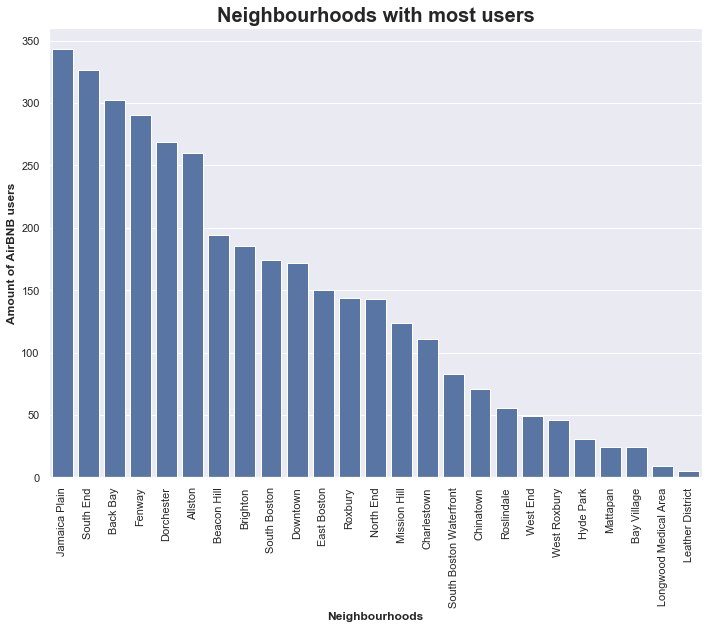

In [17]:
type_order = listings['neighbourhood_cleansed'].value_counts().index #ordering by largest to smallest
base_color = sns.color_palette()[0]
sns.countplot(data = listings, x = 'neighbourhood_cleansed', color = base_color, order = type_order);
plt.xticks(rotation = 90);
plt.title('Neighbourhoods with most users', size = 20, weight = 'bold');
plt.ylabel('Amount of AirBNB users', weight = 'bold');
plt.xlabel('Neighbourhoods', weight = 'bold');
sns.set(rc={'figure.figsize':(11.7,8.27)}); #https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

> Here I created a countplot of all the villages, so that I could get an overview of which village was getting the most AirBNB users. I ordered the counts from largest to smallest, so that I could easier see which villages had the most and which the least. By looking at this visualization it is clear that Jamaica Plain had the most AirBNB users, almost 350. Leather District had the least AirBNB users with under 10. 

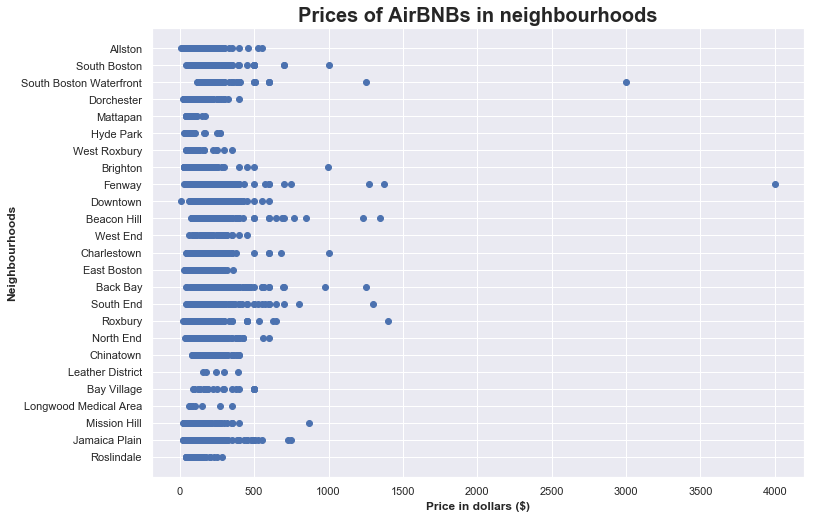

In [18]:
plt.scatter(data = listings, y = 'neighbourhood_cleansed', x = 'price')
plt.title('Prices of AirBNBs in neighbourhoods', size = 20, weight = 'bold');
plt.ylabel('Neighbourhoods', weight = 'bold');
plt.xlabel('Price in dollars ($)', weight = 'bold');

> From this scatter plot it can be seen that most Neighbourhoods seem to be in a similar price range, however South Boston Waterfront and Fenway both had an AirBNB that was at a much higher price (3000 and 4000 dollars). From this plot it can be seen however, that Mattapan had by far the lowest price range, with the highest price beeing less than 250 dollars. 

In [19]:
listings.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values()

neighbourhood_cleansed
Mattapan                    75.125000
Hyde Park                   86.548387
Dorchester                  91.639405
Roslindale                  98.428571
West Roxbury               107.108696
Allston                    112.307692
Brighton                   118.767568
East Boston                119.153333
Mission Hill               121.967742
Longwood Medical Area      138.444444
Jamaica Plain              138.478134
Roxbury                    146.333333
South Boston               187.609195
North End                  195.678322
Charlestown                198.045045
South End                  204.349693
West End                   209.591837
Fenway                     220.393103
Beacon Hill                224.443299
Chinatown                  232.352113
Downtown                   236.459302
Back Bay                   240.950331
Leather District           253.600000
Bay Village                266.833333
South Boston Waterfront    306.060241
Name: price, dtype: float64

> Here I used the groupby() function to group the prices by the neighbourhood column and then list the average prices of the AirBNB's for each neighbourhood. I then ordered these values from smallest to largest, so that I could see which of the neighbourhoods had the highest average price and which the lowest. By looking at this information, it can be seen that South Boston Waterfront has the highest average price being 306 dollars, closely followed by the neighbourhood Bay Village which has an average price of 266 dollars. 

# If the price is higher, is the rating higher?

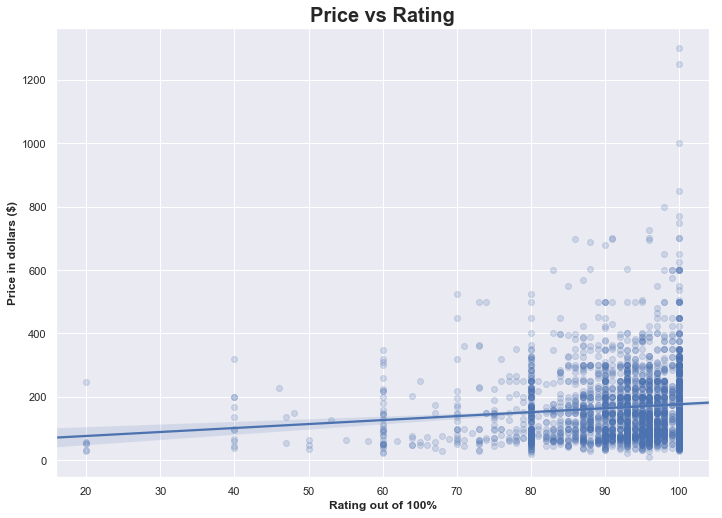

In [20]:
sns.regplot(data = listings, x = 'review_scores_rating', y = 'price', scatter_kws = {'alpha' : 1/5}); #added transparency so that the overlap can be seen
plt.title('Price vs Rating', size = 20, weight = 'bold');
plt.ylabel('Price in dollars ($)', weight = 'bold');
plt.xlabel('Rating out of 100%', weight = 'bold');
# I used a regplot to plot these two variables, so that the line of best fit is also plotted, which can help understand
# the relationship of the data better. 

> This plot shows that yes, as price increases the user rating increases as well, but also shows, that price doesn't necessarily affect the rating, as there is a large number of dots in the bottom right area, which means low cost, but high rating. However when the ratings are very low, the price of the AirBNB seems to be on the lower end as well, which gives us an insight that in some cases, when the AirBNB is cheaper, then the user experience is worse, but not in most cases. 

# Conclusion:
> 1. Highest price for AirBNB was 4000 dollars. The majority of AirBNBs were less than or equal to 200 dollars. 
> 2. Mattapan was the cheapest area, whereas South Boston Waterfront had the more expensive AirBNBs. 
> 3. Expensive AirBNBs have high ratings, however the AirBNBs don't need to be expensive to have a high rating. 